#Deep NN for MNIST dataset

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

# Step 1: Load and Preprocess Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 2: Build the Convolutional Neural Network (CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Define Callbacks (EarlyStopping and LearningRateScheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.001 * np.exp(0.1 * (5 - epoch))

learning_rate_scheduler = LearningRateScheduler(lr_scheduler)

# Step 5: Train the Model with Callbacks
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping, learning_rate_scheduler])

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc * 100:.2f}%')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
422/422 [==============================] - 50s 114ms/step - loss: 0.3069 - accuracy: 0.9057 - val_loss: 0.0571 - val_accuracy: 0.9847 - lr: 0.0010
Epoch 2/20
422/422 [==============================] - 42s 99ms/step - loss: 0.0970 - accuracy: 0.9707 - val_loss: 0.0459 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 3/20
422/422 [==============================] - 43s 101ms/step - loss: 0.0710 - accuracy: 0.9794 - val_loss: 0.0429 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 4/20
422/422 [==============================] - 41s 98ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0356 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 5/20
422/422 [==============================] - 41s 98ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0361 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 6/20
422/422 [==============================] - 42s 101ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0327 - val_accuracy: 0.9917 - l

1/1 [==============================] - 0s 56ms/step


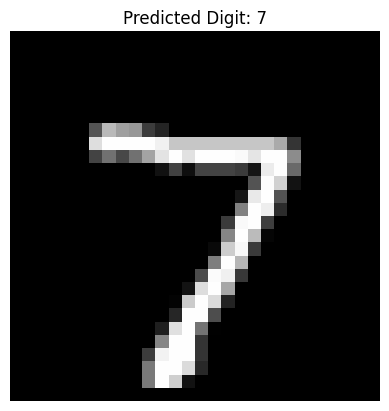

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

# Load the MNIST dataset
(_, _), (X_test, y_test) = mnist.load_data()

# Choose an image from the test set (for example, the first image)
image_index = 0  # Change this index to select a different image
test_image = X_test[image_index]

# Preprocess the image
test_image = test_image.reshape(1, 28, 28, 1)  # Reshape to match model input shape
test_image = test_image / 255.0  # Normalize pixel values (similar to training data)

# Perform prediction
predictions = model.predict(test_image)

# Get the predicted digit (index of the highest probability class)
predicted_digit = np.argmax(predictions)

# Display the image and prediction result
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 22ms/step


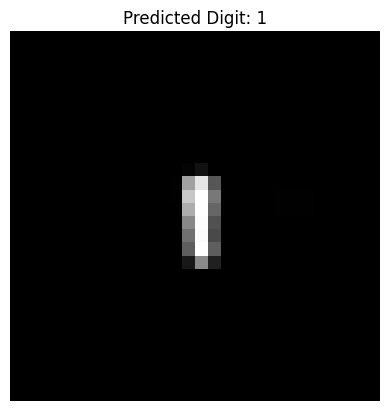

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    response = requests.get(image_path)
    image = Image.open(BytesIO(response.content))

    # Resize the image to 28x28 and convert to grayscale
    image = image.resize((28, 28)).convert('L')

    # Convert image to numpy array
    image_array = np.array(image)

    # Normalize the pixel values (similar to training data)
    image_array = image_array / 255.0

    # Reshape the image to match the model input format (1 sample, 28x28 pixels, 1 channel)
    image_array = image_array.reshape(1, 28, 28, 1)

    return image_array

# URL of the image you want to test
image_url = 'https://i.pinimg.com/originals/59/02/6a/59026a58d480b3297899be25481d80fa.jpg'

# Preprocess the image
test_image = preprocess_image(image_url)

# Perform prediction
predictions = model.predict(test_image)

# Get the predicted digit (index of the highest probability class)
predicted_digit = np.argmax(predictions)

# Display the image and prediction result
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 38ms/step


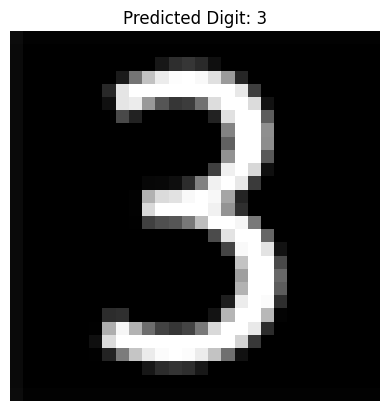

In [ ]:
# URL of the image you want to test
image_url = 'https://i.pinimg.com/originals/57/3a/ea/573aea4cdb1ce4f872108d51d473a5b0.jpg'

# Preprocess the image
test_image = preprocess_image(image_url)

# Perform prediction
predictions = model.predict(test_image)

# Get the predicted digit (index of the highest probability class)
predicted_digit = np.argmax(predictions)

# Display the image and prediction result
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 26ms/step


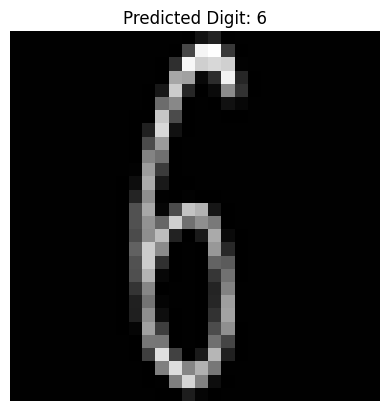

In [ ]:
# URL of the image you want to test
image_url = 'https://st3.depositphotos.com/7920174/19403/v/600/depositphotos_194035398-stock-video-handwritten-white-chalk-arabic-numbers.jpg'

# Preprocess the image
test_image = preprocess_image(image_url)

# Perform prediction
predictions = model.predict(test_image)

# Get the predicted digit (index of the highest probability class)
predicted_digit = np.argmax(predictions)

# Display the image and prediction result
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()